In [64]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
words = open('names.txt', 'r').read().splitlines()

In [66]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [67]:
len(words)

32033

In [68]:
[min(len(w) for w in words), max(len(w) for w in words)]

[2, 15]

In [69]:
lens = [len(w) for w in words]
m = 100
for i,w in enumerate(words):
    if len(w) < m:
        print(i,w,len(w))
        m = len(w)

0 emma 4
2 ava 3
3654 an 2


In [70]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)} 
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print('stoi',stoi)
print('itos', itos)

stoi {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
itos {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [71]:
N = torch.zeros((26+1,26+1), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1,c2 in zip(chs, chs[1:]):
        bigram = (c1,c2) # sequence of 2 letters (+ special chars)
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        N[ix1][ix2] += 1
        #b[bigram] = b.get(bigram, 0) + 1

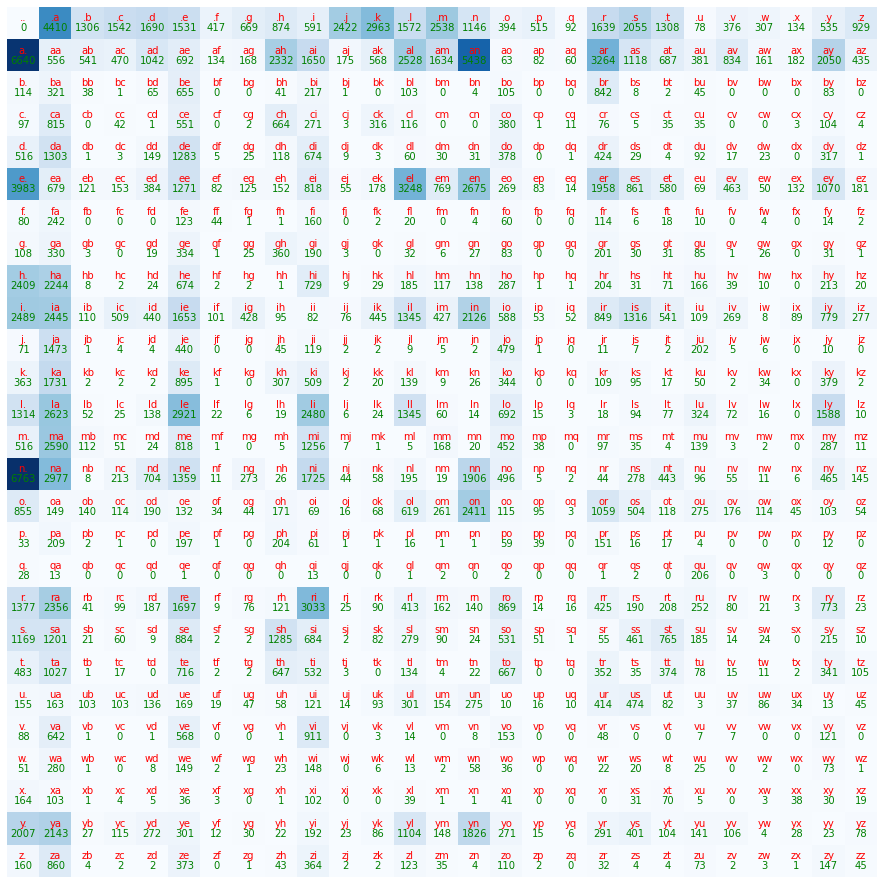

In [72]:
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='green')
        plt.axis('off')

In [73]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [74]:
p = N[0].float()
p = p / p.sum()


In [75]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [76]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,  7,
        19,  1, 11, 18, 10, 11, 15,  2,  9, 18,  2,  5,  3,  1, 13, 11, 11, 22,
        11, 15, 26,  2, 18, 13, 10,  1, 15,  2,  3, 15, 10, 12,  4,  9,  3,  4,
         6,  4, 19, 10,  3,  8,  4, 10, 13, 14, 13, 10, 19, 11,  8, 13,  5,  5,
         6, 25, 20, 10, 18,  1,  8,  3,  2, 20,  1,  1,  3, 10, 11, 25, 18,  1,
         9, 11,  8, 12,  3, 12, 19,  9, 18, 13])

In [77]:
# 27, 27
# 27, 1
# study torch broadcasting rules
P = (N+1).float() # add 1: model smoothing (avoids 0s and infinite loss)
P /= P.sum(1, keepdim=True) 
P[10]


tensor([2.4599e-02, 5.0359e-01, 6.8329e-04, 1.7082e-03, 1.7082e-03, 1.5067e-01,
        3.4165e-04, 3.4165e-04, 1.5716e-02, 4.0998e-02, 1.0249e-03, 1.0249e-03,
        3.4165e-03, 2.0499e-03, 1.0249e-03, 1.6399e-01, 6.8329e-04, 3.4165e-04,
        4.0998e-03, 2.7332e-03, 1.0249e-03, 6.9354e-02, 2.0499e-03, 2.3915e-03,
        3.4165e-04, 3.7581e-03, 3.4165e-04])

In [78]:
g = torch.Generator().manual_seed(2147483647)

# make more words using the statistical model

for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break;
    print("".join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [79]:
# likelyhood is the product of the probabilities
# log (a * b) = log(a) + log(b)
n = 0
loglikelihood = 0.0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1,c2 in zip(chs, chs[1:]):
        bigram = (c1,c2) # sequence of 2 letters (+ special chars)
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        loglikelihood += logprob
        #print(f'{c1}{c2}: {prob:.4f} {logprob:.4f}')
        n += 1
nll = -loglikelihood / n
print(f'normalized negative loglikelihood {nll}')

print(""" 
GOAL: maximize likelihood of the w.r.t model parameters (statistical modeling)
    equivalent to maximizing the log likelihood (because log is monotonic)
    equivalent to minimizing the negative log likelihood
    equivalent to minimizing the average negative likelihood
""")

normalized negative loglikelihood 2.4543561935424805
 
GOAL: maximize likelihood of the w.r.t model parameters (statistical modeling)
    equivalent to maximizing the log likelihood (because log is monotonic)
    equivalent to minimizing the negative log likelihood
    equivalent to minimizing the average negative likelihood



In [80]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1,c2 in zip(chs, chs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [81]:
len(xs)

228146

In [82]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

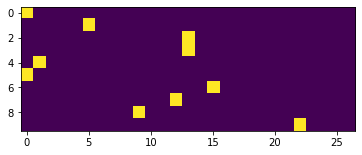

In [83]:
# visualize the input (a vector of zeros with a single 1 corresponding to the bigram's input first letter)
xenc = F.one_hot(xs[0:10], num_classes=27).float() 
plt.imshow(xenc)

In [84]:
xenc.dtype

torch.float32

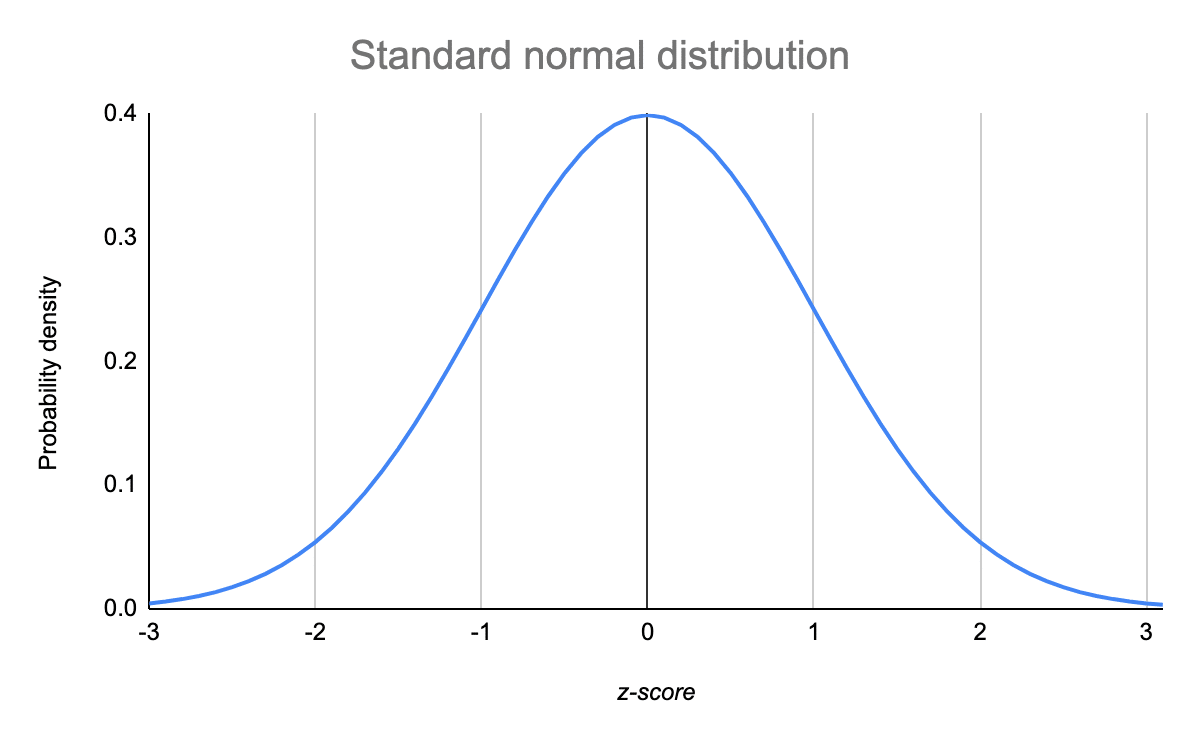

In [85]:
import torch.nn.functional as F

# Design of the neural net output:
# we are trying to produce a probability distribution for each potential next character
# we are going to generate log counts, and exponentiate them to get counts

xenc = F.one_hot(xs, num_classes=27).float() # one hot encoding of inputs (26 0 and one 1.0)
# weights of our neurons
# randn uses the standard normal distribution
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
# W is 27, 27
# xenc is 5, 27
logits = xenc @ W # is 5 27 (using matrix multiplication pytorch operator)
# this is the firing rate of the neurons
counts = logits.exp() # log-counts exponentiating makes all values positivesb
probs = counts / counts.sum(1, keepdims=True)
probs # we get a probability distribution. All these operations are back propagatable

# last 2 lness are softmax activation function (see https://en.wikipedia.org/wiki/Softmax_function)

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]],
       grad_fn=<DivBackward0>)

In [86]:
print(logits.shape)
print('fire[3][13] = ',logits[3,13]) # 13 the neuron looking at 3rd output
logits.shape

torch.Size([228146, 27])
fire[3][13] =  tensor(0.0379, grad_fn=<SelectBackward0>)


torch.Size([228146, 27])

In [87]:
xenc[3] # 3rd input

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
# 13 the neuron. 13 th column of W
W[:,13] 

tensor([-4.3297e-01, -9.6478e-01,  2.1346e+00, -7.2759e-01, -1.3753e-01,
        -1.3132e-03, -3.1566e-01,  1.1199e+00, -4.7701e-01, -1.5065e+00,
         1.2108e+00, -4.0636e-01,  1.9110e-01,  3.7882e-02,  1.3431e+00,
         2.4311e-01, -1.5364e-01, -1.1583e+00,  1.1614e+00,  4.2016e-01,
         2.7359e-01,  3.6583e-01,  1.7128e+00,  1.3769e+00, -8.9778e-01,
        -9.5177e-01,  1.4723e-01], grad_fn=<SelectBackward0>)

In [89]:
xx = xenc[3] * W[:,13] # element wise multiply

In [90]:
xx.sum() # same value as fire[3,13]

tensor(0.0379, grad_fn=<SumBackward0>)

In [91]:
probs[0] # row 0: probability of next character for the first example

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)

In [92]:
nlls = torch.zeros(5)
for i in range (5):
    x = xs[i].item() # input char index
    y = ys[i].item() # label character index (desired output)
    print('-------')
    print(f'bigram of example {i+1}: {itos[x]}{itos[y]} (indices {x}, {y})')
    print(f'input to the neural net:', x)
    print(f'output probabilities from the neural net:', probs[i])
    print(f'label (actual next character): {y}')
    p = probs[i][y]
    print(f'probability assigned by the net to the corrrect character: {p.item()}')
    logp = torch.log(p)
    nll = -logp
    print('log likelihood:', logp.item(), 'negative log likelihood:', nll)
    nlls[i] = nll
print("=======")
print(f'average negative log likelihood, i.e. loss = {nlls.mean().item()}')

-------
bigram of example 1: .e (indices 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the corrrect character: 0.01228625513613224
log likelihood: -4.399273872375488 negative log likelihood: tensor(4.3993, grad_fn=<NegBackward0>)
-------
bigram of example 2: em (indices 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label 

In [93]:
# these are the probabilities we're interested in (the prob of the correct character for each of our 5 sample)
probs[0, 5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [94]:
# for the loss, we use the labels (correct examples, bigrams second letters) and we look at the probablity of
# the labels inside probs (we're not looking at the other letters probability accordind to our model)
labels = ys[0:5]
loss = -probs[torch.arange(5), labels].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

xs tensor([ 0,  5, 13, 13,  1]) nb 5
ys tensor([ 5, 13, 13,  1,  0]) nb 5
initial loss: 3.7693049907684326 final loss: 0.3153038024902344 after 300 iterations


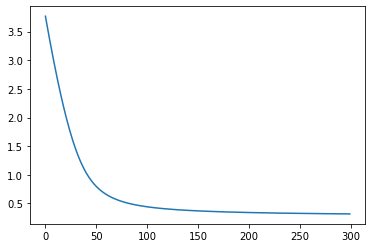

In [102]:
g = torch.Generator().manual_seed(2147483647)

W = torch.randn((27, 27), generator=g, requires_grad=True)
# this also works
# W = torch.ones((27, 27),requires_grad=True)

xs = xs[:5]
ys = ys[:5]

num = len(xs)

print('xs', xs, 'nb', num)
print('ys', ys, 'nb', num)

losses = []
for i in range(300):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # one hot encoding of inputs (array with 26 0.0 and one 1.0)
    logits = xenc @ W
    counts = logits.exp()
    
    probs = counts / counts.sum(dim=1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    # save the convergence
    losses.append(loss.item())    
    # backward pass
    W.grad = None # a torch way to set the gradient to 0
    loss.backward()
     
    # update
    W.data += -0.50 * W.grad

plt.plot(losses)
print('initial loss:', losses[0], 'final loss:', losses[-1], 'after', len(losses), 'iterations')